# Using the Variational Quantum Linear Solver

This notebook illustrates how to use the VQLS integrated in the library via our `vqls-protoype`.
We first need to sdefine the linear system:

$$A \cdot x = b$$

We use here a randon sparse matrix $A$ and a random right hand side vector $b$

In [10]:
from scipy.sparse import random as sprand 
import numpy as np 

A = sprand(4,4, density=0.8, format='csr')
A = np.random.rand(4,4)
A = A+A.T
b = np.random.rand(4)

## Classical Solution
We can of course obtain the solution of this linear system using `numpy` 

In [11]:
ref = np.linalg.solve(A,b)

## VQLS Solution 
To use the VQLS solver we need to define a few primitives that are critical to its operation. Those are: a qiskit estimator, a variational ansatz and an optimizer.  All of those are predefined in qiskit and we cans imply leverage them

In [15]:
from qiskit.primitives import Estimator 
from qiskit.circuit.library import RealAmplitudes 
import qiskit.algorithms.optimizers as optim

estimator = Estimator()
ansatz = RealAmplitudes(2, reps=3)
optim = optim.CG()

We can now instantiate the solver and solve the linear ssytem

In [16]:
from quantum_newton_raphson.vqls_solve import VQLS_SOLVER
solver = VQLS_SOLVER(estimator=estimator, ansatz=ansatz, optimizer=optim, matrix_decomposition='symmetric')
sol = solver(A, b)

/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


## Visualize the solution
We can plot the evolution of the cost function using matplotlib

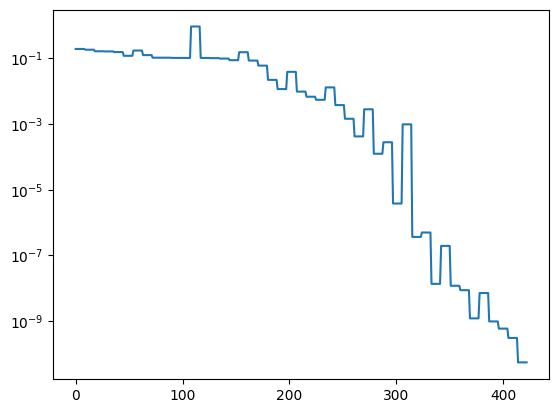

In [17]:
import matplotlib.pyplot as plt 
plt.semilogy(sol.logger.values)

And also verify the accuracy of the solution obtaind via the VQLS solver

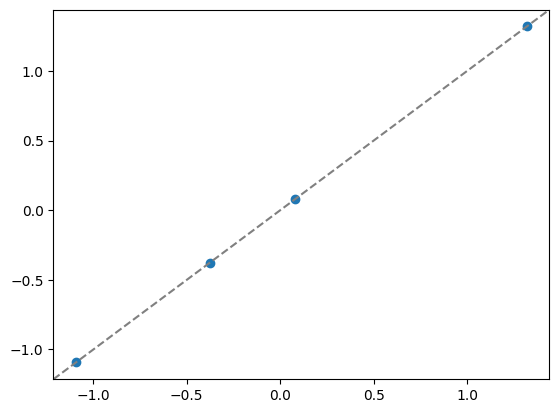

In [18]:
import matplotlib.pyplot as plt 
plt.scatter(np.linalg.solve(A,b), sol.solution)
_ = plt.axline( (0,0),slope=1,linestyle='--',color='grey')